โหลด label ทั้งหมดสำเร็จ: 42,609 epochs


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24684\3502438279.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stage_name', data=df_labels, palette='viridis', order=['N1', 'N2', 'N3', 'REM', 'Wake'])


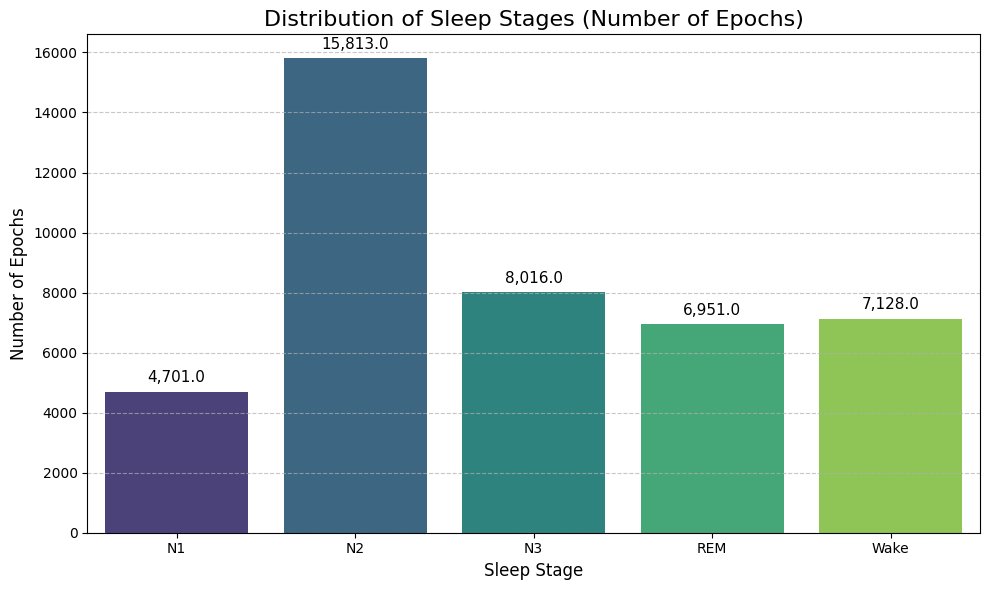

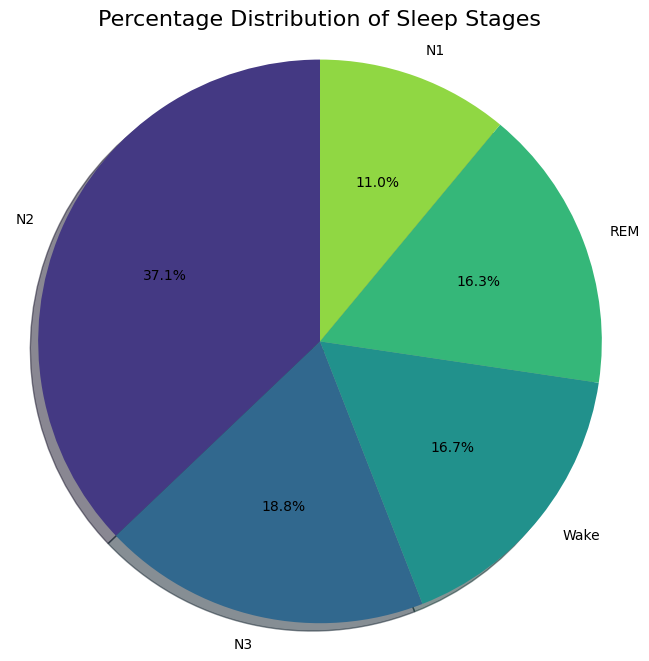

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24684\3502438279.py:62: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df_labels, x='stage_name', discrete=True, kde=False,


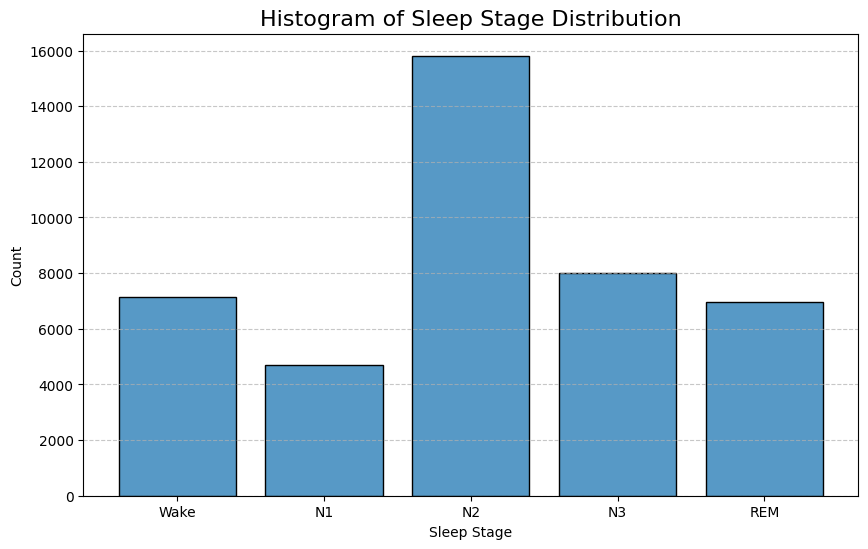


สรุปการกระจาย label:
stage_name
N2      15813
N3       8016
Wake     7128
REM      6951
N1       4701
Name: count, dtype: int64

เปอร์เซ็นต์:
stage_name
N2      37.111878
N3      18.812927
Wake    16.728860
REM     16.313455
N1      11.032880
Name: proportion, dtype: float64


In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ----------------------------- ตั้งค่า path -----------------------------
DATA_DIR = r"C:\\Users\\ADMIN\\Desktop\\Sleep recording\\dataeeg_custom_10s"  # ปรับ path ถ้าต่าง

# Label mapping ของคุณ (สำหรับแสดงชื่อสวย ๆ ในกราฟ)
label_names = {0: 'N1', 1: 'N2', 2: 'N3', 3: 'REM', 4: 'Wake'}

# ----------------------------- โหลด label ทั้งหมดจาก .npz -----------------------------
all_npz = glob.glob(os.path.join(DATA_DIR, "*.npz"))

if len(all_npz) == 0:
    print("ไม่พบไฟล์ .npz ในโฟลเดอร์! ตรวจสอบ path แล้วลองใหม่")
else:
    all_y = []
    for file in all_npz:
        data = np.load(file)
        all_y.append(data['y'])
    
    all_labels = np.concatenate(all_y)
    print(f"โหลด label ทั้งหมดสำเร็จ: {len(all_labels):,} epochs")
    
    # สร้าง DataFrame เพื่อพล็อตง่ายขึ้น
    df_labels = pd.DataFrame({'stage': all_labels})
    df_labels['stage_name'] = df_labels['stage'].map(label_names)

    # ----------------------------- พล็อต 1: Bar Chart (Count per class) -----------------------------
    plt.figure(figsize=(10, 6))
    sns.countplot(x='stage_name', data=df_labels, palette='viridis', order=['N1', 'N2', 'N3', 'REM', 'Wake'])
    plt.title('Distribution of Sleep Stages (Number of Epochs)', fontsize=16)
    plt.xlabel('Sleep Stage', fontsize=12)
    plt.ylabel('Number of Epochs', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # เพิ่มตัวเลขบนแท่ง
    for p in plt.gca().patches:
        plt.gca().annotate(f'{p.get_height():,}', 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha='center', va='center', fontsize=11, 
                           xytext=(0, 10), textcoords='offset points')
    
    plt.tight_layout()
    plt.show()

    # ----------------------------- พล็อต 2: Pie Chart (Percentage) -----------------------------
    plt.figure(figsize=(8, 8))
    stage_counts = df_labels['stage_name'].value_counts()
    plt.pie(stage_counts, labels=stage_counts.index, autopct='%1.1f%%', 
            colors=sns.color_palette('viridis', len(stage_counts)), 
            startangle=90, shadow=True)
    plt.title('Percentage Distribution of Sleep Stages', fontsize=16)
    plt.axis('equal')
    plt.show()

    # ----------------------------- พล็อต 3: Histogram (ถ้าอยากดูแบบ distribution) -----------------------------
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_labels, x='stage_name', discrete=True, kde=False, 
                 palette='viridis', shrink=0.8)
    plt.title('Histogram of Sleep Stage Distribution', fontsize=16)
    plt.xlabel('Sleep Stage')
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # สรุปสถิติสั้น ๆ
    print("\nสรุปการกระจาย label:")
    print(df_labels['stage_name'].value_counts())
    print("\nเปอร์เซ็นต์:")
    print(df_labels['stage_name'].value_counts(normalize=True) * 100)